In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

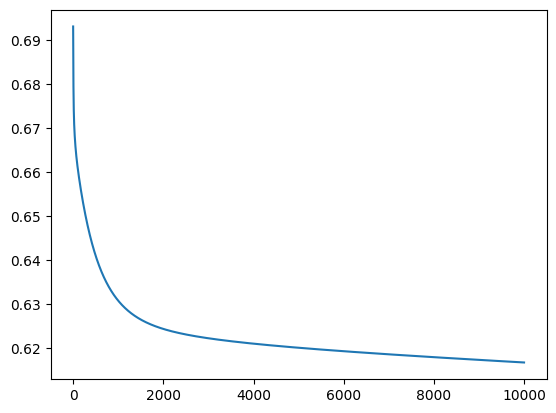

In [51]:
diabetes = pd.read_csv("Downloads/diabetes.csv")
X = diabetes.iloc[:, 0:9]
Y = diabetes.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_train = Y_train.T
X_train = X_train.to_numpy()
X_train = X_train.T
X_train.shape[1]
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def logreg_model(X, Y, learning_rate, iterations):
    m = X.shape[1]
    n = X.shape[0]
    W = np.zeros((n,1))
    B = 0
    cost_items = []
    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        cost = (-1/m)*np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))
        dW = (1/m)*np.dot(X, (A - Y).T)
        dB = (1/m)*np.sum(A - Y)
        W = W - learning_rate*dW
        B = B - learning_rate*dB
        cost_items.append(cost)

    return W, B, cost_items
iterations = 10000
learning_rate = 0.00001
W, B, cost_items = logreg_model(X_train, Y_train, learning_rate, iterations)
plt.plot(np.arange(iterations), cost_items)
plt.show()